In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('rekomendasi_simpledesa2.csv')
data.head(10)

,Belanja Pembangunan,Apb Desa,Nilai Idm,Nama Desa,Nama Kecamatan,Nama Kabupaten,Nama Provinsi,Proba,Status,Rank
0,1.980781e+09,2.569049e+09,0.8138,BONGAS,CILILIN,KABUPATEN BANDUNG BARAT,JAWA BARAT,0.784458,Rekomendasi Simpledesa,1.0
1,2.049356e+09,2.625417e+09,0.8905,CIBOGO,LEMBANG,KABUPATEN BANDUNG BARAT,JAWA BARAT,0.784458,Rekomendasi Simpledesa,2.0
2,2.015385e+09,2.625198e+09,0.8251,SALEM,SALEM,KABUPATEN BREBES,JAWA TENGAH,0.784458,Rekomendasi Simpledesa,1.0
3,1.917144e+09,2.601832e+09,0.8321,KUSAMBA,DAWAN,KABUPATEN KLUNGKUNG,BALI,0.784458,Rekomendasi Simpledesa,1.0
4,2.089880e+09,2.374219e+09,0.8351,LAWALLU,SOPPENG RIAJA,KABUPATEN BARRU,SULAWESI SELATAN,0.777522,Rekomendasi Simpledesa,2.0
5,2.143643e+09,2.439683e+09,0.8775,SANGKANHURIP,KATAPANG,KABUPATEN BANDUNG,JAWA BARAT,0.777522,Rekomendasi Simpledesa,2.0
6,2.159645e+09,2.726799e+09,0.8825,TUSAN,BANJARANGKAN,KABUPATEN KLUNGKUNG,BALI,0.772371,Rekomendasi Simpledesa,1.0
7,1.760208e+09,2.373708e+09,0.8125,BAROS,ARJASARI,KABUPATEN BANDUNG,JAWA BARAT,0.772371,Rekomendasi Simpledesa,2.0
8,1.888408e+09,2.524775e+09,0.8187,LENEK DAYA,LENEK,KABUPATEN LOMBOK TIMUR,NUSA TENGGARA BARAT,0.772371,Rekomendasi Simpledesa,1.0
9,2.030077e+09,2.644428e+09,0.8327,BELENDUNG,PURWADADI,KABUPATEN SUBANG,JAWA BARAT,0.772371,Rekomendasi Simpledesa,1.0


In [ ]:
data['Status'] = data['Status'].replace('Rekomendasi Simpledesa', 'Rekomendasi_Simpledesa')

In [ ]:
# Hitung selisih APB Desa - Belanja Pembangunan
data["Selisih_APB_Belanja_Pembangunan"] = data["Apb Desa"] - data["Belanja Pembangunan"]

# Tampilkan DataFrame dengan kolom baru
data.head(10)

,Belanja Pembangunan,Apb Desa,Nilai Idm,Nama Desa,Nama Kecamatan,Nama Kabupaten,Nama Provinsi,Proba,Status,Rank,Selisih_APB_Belanja_Pembangunan
0,1.980781e+09,2.569049e+09,0.8138,BONGAS,CILILIN,KABUPATEN BANDUNG BARAT,JAWA BARAT,0.784458,Rekomendasi_Simpledesa,1.0,588268225.0
1,2.049356e+09,2.625417e+09,0.8905,CIBOGO,LEMBANG,KABUPATEN BANDUNG BARAT,JAWA BARAT,0.784458,Rekomendasi_Simpledesa,2.0,576060624.0
2,2.015385e+09,2.625198e+09,0.8251,SALEM,SALEM,KABUPATEN BREBES,JAWA TENGAH,0.784458,Rekomendasi_Simpledesa,1.0,609812647.0
3,1.917144e+09,2.601832e+09,0.8321,KUSAMBA,DAWAN,KABUPATEN KLUNGKUNG,BALI,0.784458,Rekomendasi_Simpledesa,1.0,684688162.0
4,2.089880e+09,2.374219e+09,0.8351,LAWALLU,SOPPENG RIAJA,KABUPATEN BARRU,SULAWESI SELATAN,0.777522,Rekomendasi_Simpledesa,2.0,284339366.0
5,2.143643e+09,2.439683e+09,0.8775,SANGKANHURIP,KATAPANG,KABUPATEN BANDUNG,JAWA BARAT,0.777522,Rekomendasi_Simpledesa,2.0,296040000.0
6,2.159645e+09,2.726799e+09,0.8825,TUSAN,BANJARANGKAN,KABUPATEN KLUNGKUNG,BALI,0.772371,Rekomendasi_Simpledesa,1.0,567154400.0
7,1.760208e+09,2.373708e+09,0.8125,BAROS,ARJASARI,KABUPATEN BANDUNG,JAWA BARAT,0.772371,Rekomendasi_Simpledesa,2.0,613500000.0
8,1.888408e+09,2.524775e+09,0.8187,LENEK DAYA,LENEK,KABUPATEN LOMBOK TIMUR,NUSA TENGGARA BARAT,0.772371,Rekomendasi_Simpledesa,1.0,636366868.0
9,2.030077e+09,2.644428e+09,0.8327,BELENDUNG,PURWADADI,KABUPATEN SUBANG,JAWA BARAT,0.772371,Rekomendasi_Simpledesa,1.0,614350200.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Memilih fitur-fitur yang relevan (sesuaikan dengan kebutuhan)
X = data[["Nilai Idm", "Proba", "Rank", "Selisih_APB_Belanja_Pembangunan"]]
y = data["Status"]  # Kolom "Status" akan menjadi target

# Ubah kolom "Status" menjadi label biner (misalnya, 0 untuk Tidak Rekomendasi dan 1 untuk Rekomendasi Simpledesa)
y = np.where(y == "Rekomendasi Simpledesa", 1, 0)

# Memisahkan data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model dengan parameter tetap
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2)

# Menghasilkan prediksi pada semua data
X_all = scaler.transform(X)
y_all_pred = model.predict(X_all)
y_all_pred = y_all_pred.flatten()

# Menggabungkan prediksi dengan data asli
data["Prediksi_Potensi"] = y_all_pred

# Mengurutkan data berdasarkan prediksi potensi (dari yang tertinggi ke terendah)
sorted_data = data.sort_values(by="Prediksi_Potensi", ascending=False)

# Tampilkan 10 desa paling berpotensi
top_10_desa = sorted_data.head(10)
print(top_10_desa[["Nama Desa", "Prediksi_Potensi"]])

Epoch 1/20
210/210 - 2s - loss: 0.2290 - accuracy: 0.9529 - val_loss: 0.0175 - val_accuracy: 1.0000 - 2s/epoch - 7ms/step
Epoch 2/20
210/210 - 0s - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000 - 484ms/epoch - 2ms/step
Epoch 3/20
210/210 - 0s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000 - 388ms/epoch - 2ms/step
Epoch 4/20
210/210 - 0s - loss: 9.8582e-04 - accuracy: 1.0000 - val_loss: 7.0419e-04 - val_accuracy: 1.0000 - 398ms/epoch - 2ms/step
Epoch 5/20
210/210 - 0s - loss: 5.5938e-04 - accuracy: 1.0000 - val_loss: 4.2886e-04 - val_accuracy: 1.0000 - 388ms/epoch - 2ms/step
Epoch 6/20
210/210 - 1s - loss: 3.5589e-04 - accuracy: 1.0000 - val_loss: 2.8502e-04 - val_accuracy: 1.0000 - 575ms/epoch - 3ms/step
Epoch 7/20
210/210 - 1s - loss: 2.4345e-04 - accuracy: 1.0000 - val_loss: 2.0051e-04 - val_accuracy: 1.0000 - 544ms/epoch - 3ms/step
Epoch 8/20
210/210 - 1s - loss: 1.7503e-04 - accuracy: 1.0000 - val_loss: 1.4724e-04 - val_accur

In [ ]:
sorted_data.head(10)

,Belanja Pembangunan,Apb Desa,Nilai Idm,Nama Desa,Nama Kecamatan,Nama Kabupaten,Nama Provinsi,Proba,Status,Rank,Selisih_APB_Belanja_Pembangunan,Prediksi_Potensi
5166,5.968000e+07,2.548235e+10,0.7641,GITGIT,SUKASADA,KABUPATEN BULELENG,BALI,0.623715,Rekomendasi_Simpledesa,2.0,2.542267e+10,0.000961
4936,3.601244e+09,1.294445e+10,0.7665,MADENAN,TEJAKULA,KABUPATEN BULELENG,BALI,0.625941,Rekomendasi_Simpledesa,2.0,9.343208e+09,0.000332
10724,1.095000e+08,1.003224e+10,0.7837,DOPLANG,ADIPALA,KABUPATEN CILACAP,JAWA TENGAH,0.573650,Rekomendasi_Simpledesa,2.0,9.922735e+09,0.000301
14074,2.751253e+07,4.900309e+10,0.7787,SEMAMUNG,MOYO HULU,KABUPATEN SUMBAWA,NUSA TENGGARA BARAT,0.548689,Rekomendasi_Simpledesa,2.0,4.897558e+10,0.000299
4756,0.000000e+00,1.168930e+10,0.7241,CIAMPEL,KERSANA,KABUPATEN BREBES,JAWA TENGAH,0.628292,Rekomendasi_Simpledesa,2.0,1.168930e+10,0.000288
5753,5.269700e+07,7.894307e+09,0.7190,CIULU,BANJARSARI,KABUPATEN CIAMIS,JAWA BARAT,0.616271,Rekomendasi_Simpledesa,2.0,7.841610e+09,0.000266
12125,0.000000e+00,1.171700e+10,0.7263,DALISODO,WAGIR,KABUPATEN MALANG,JAWA TIMUR,0.561849,Rekomendasi_Simpledesa,2.0,1.171700e+10,0.000265
8833,0.000000e+00,4.232501e+09,0.7754,SRIDADI,SIRAMPOG,KABUPATEN BREBES,JAWA TENGAH,0.588079,Rekomendasi_Simpledesa,2.0,4.232501e+09,0.000238
8481,0.000000e+00,3.952551e+09,0.7410,KALISARI,BAURENO,KABUPATEN BOJONEGORO,JAWA TIMUR,0.591196,Rekomendasi_Simpledesa,2.0,3.952551e+09,0.000220
11145,0.000000e+00,4.868452e+09,0.7671,SUKAHAJI,CIPEUNDEUY,KABUPATEN BANDUNG BARAT,JAWA BARAT,0.570625,Rekomendasi_Simpledesa,2.0,4.868452e+09,0.000210


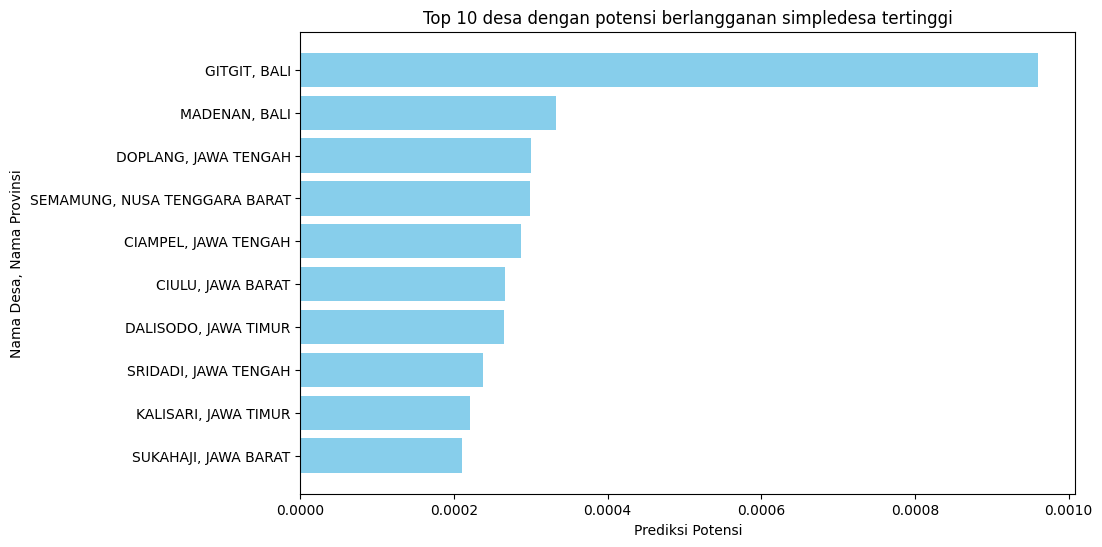

In [ ]:
import matplotlib.pyplot as plt

# Ambil 10 hasil terbesar dari sorted_data berdasarkan kolom 'prediksi_potensi'
top_10_data = sorted_data.nlargest(10, 'Prediksi_Potensi')

# Gabungkan kolom 'Nama Desa' dan 'Nama Provinsi' untuk label
top_10_data['Label'] = top_10_data['Nama Desa'] + ', ' + top_10_data['Nama Provinsi']

# Buat barplot horizontal
plt.figure(figsize=(10, 6))
plt.barh(top_10_data['Label'], top_10_data['Prediksi_Potensi'], color='skyblue')
plt.xlabel('Prediksi Potensi')
plt.ylabel('Nama Desa, Nama Provinsi')
plt.title('Top 10 desa dengan potensi berlangganan simpledesa tertinggi')
plt.gca().invert_yaxis()  # Membalik urutan agar yang terbesar ada di atas
plt.show()

In [ ]:
top_predicted_desa.to_csv("toppredicted.csv", index=False)

NameError: ignored